<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Lesson_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression 
* A dense layer without activation can do the job.

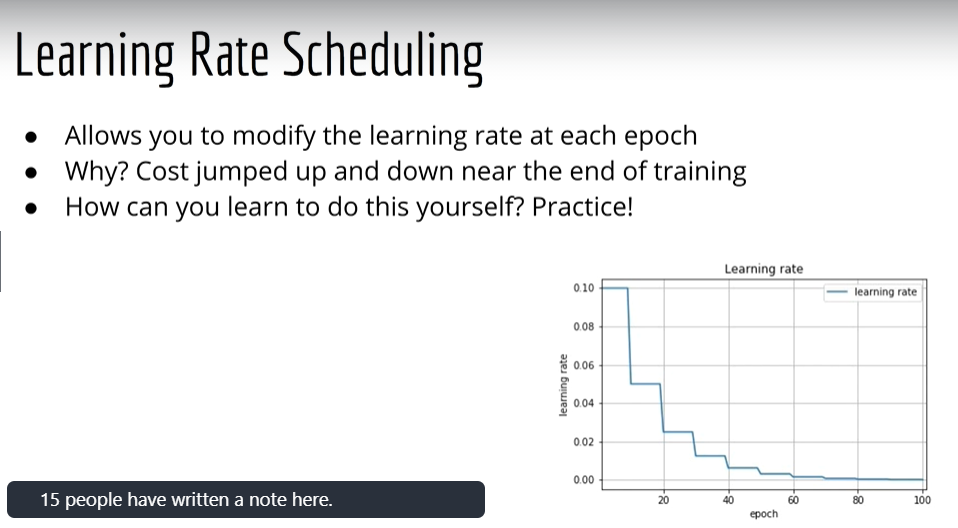

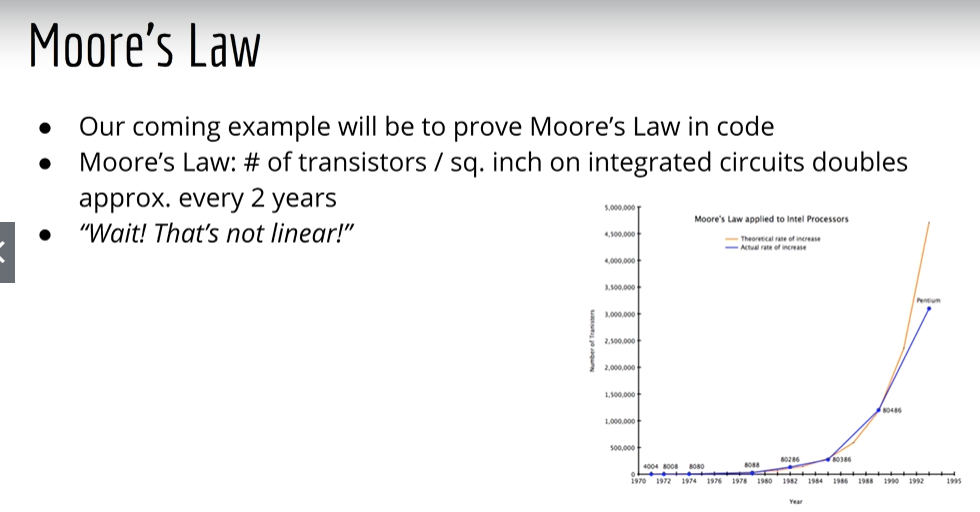

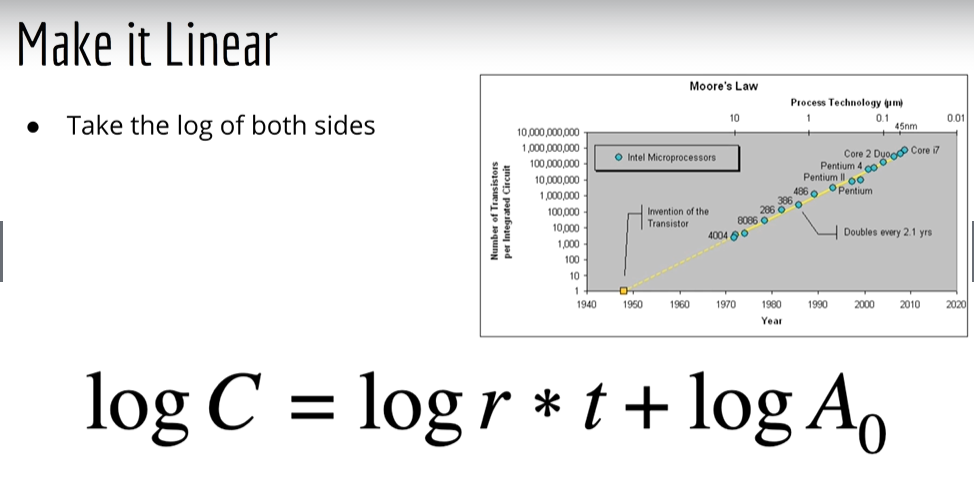

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'

--2020-10-19 00:14:03--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-19 00:14:03 (21.9 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [3]:
df = pd.read_csv('moore.csv' , header=None)

In [4]:
type(df.values)

numpy.ndarray

In [5]:
X = df[0]
y = df[1].values

In [6]:
X = X.values.reshape(-1,1) # make it 2D-array of D * N where N = 1

In [7]:
X.shape , y.shape

((162, 1), (162,))

In [8]:
D, N = X.shape

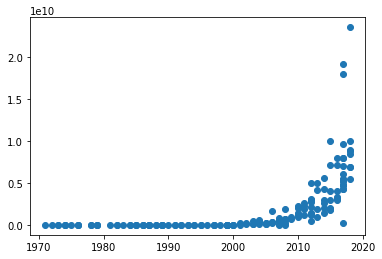

In [9]:
plt.scatter(X, y)

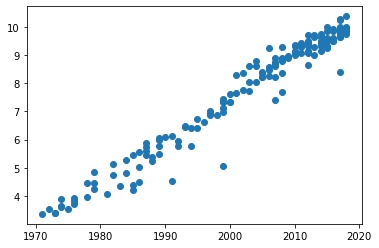

In [10]:
# since we want a linear regression
y = np.log10(y)
plt.scatter(X,y)

(array([ 8.,  8.,  9., 13.,  9., 13., 10., 23., 25., 44.]),
 array([1971. , 1975.7, 1980.4, 1985.1, 1989.8, 1994.5, 1999.2, 2003.9,
        2008.6, 2013.3, 2018. ]),
 <a list of 10 Patch objects>)

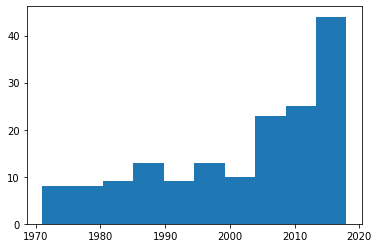

In [11]:
# Let's also center the X data around 0 so the values are not too large
# We could scale it too by diving by std but then we'd have to reverse the transformation later
plt.hist(X)

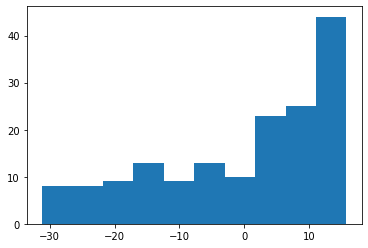

In [12]:
plt.hist(X - X.mean())
plt.show()

In [13]:
# centeralize the X
X_orig_mean = X.mean()
X = X - X_orig_mean

In [14]:
# see how good ML work
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [15]:
# evaluate the linear regression model
mean_squared_error(y, y_pred)

0.16413728852232387

In [33]:
# get slope and intercept
print('slope is {}'.format(lr.coef_))
print('intercept is {}'.format(lr.intercept_))

slope is [0.14839082]
intercept is 7.715215149999975


In [16]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [17]:
# Create our NN model
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)), ## it can also be shape=(D,N) , or shape=(1,N)
        #tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1)                            
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9),loss='mse')

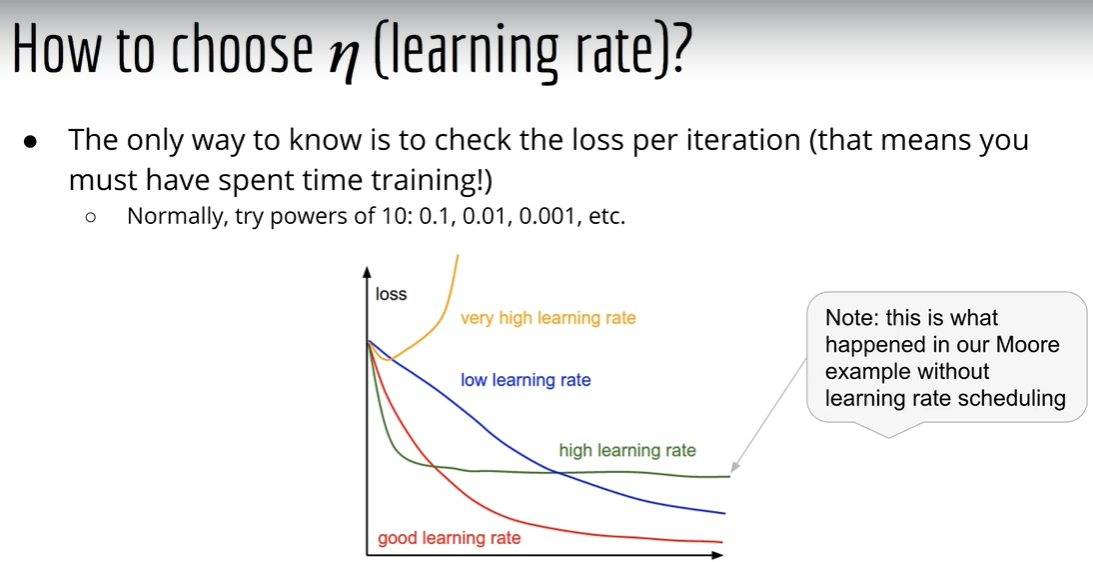

In [19]:
# learning schedule to for better convergence and lower loss
def schedule (epochs, learning_rate):
  if epochs >= 50:
    return 0.0001
  else:
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=schedule)


In [20]:
history = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 60.8234
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 62.8327
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 52.4619
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 45.3284
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 28.4810
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 25.6747
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 19.1665
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 13.3710
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 9.4236
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 10.2681
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 12.2380
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 10.9929
Epoch 13/200
6/6 [==============================] 

In [21]:
model.evaluate(X,y)

6/6 [==============================] - 0s 2ms/step - loss: 0.1651


0.16511476039886475

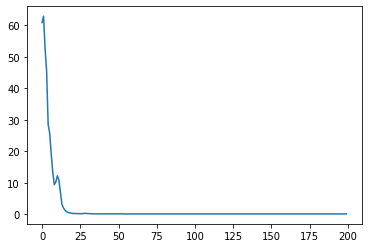

In [22]:
plt.plot(history.history['loss'])

In [54]:
# Get the slope of the line
# slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())
a = model.layers[0].get_weights()[0][0,0]
b = model.layers[0].get_weights()[1][0]
print('slope is {}, and intercept is {}'.format(a,b))

[array([[0.14610647]], dtype=float32), array([7.7128572], dtype=float32)]
slope is 0.14610646665096283, and intercept is 7.712857246398926


In [23]:
pred = model.predict(X)

In [24]:
pred.shape

(162, 1)

(array([[ 0.,  0.,  0., ..., 22., 33., 69.],
        [ 0.,  0.,  0., ..., 24., 32., 67.],
        [ 0.,  0.,  0., ..., 22., 33., 69.],
        ...,
        [11., 21., 18., ...,  0.,  0.,  0.],
        [16., 22., 22., ...,  0.,  0.,  0.],
        [11., 21., 18., ...,  0.,  0.,  0.]]),
 array([-7.21821554, -5.83039678, -4.44257802, -3.05475926, -1.6669405 ,
        -0.27912173,  1.10869703,  2.49651579,  3.88433455,  5.27215331,
         6.65997207]),
 <a list of 162 Lists of Patches objects>)

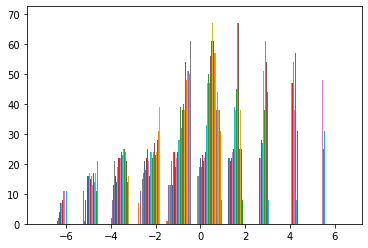

In [25]:
plt.hist(pred.reshape(162,1) - y)

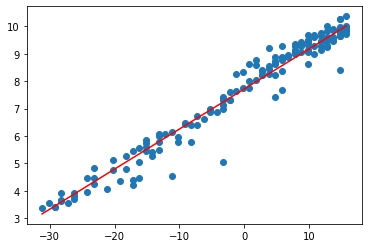

In [59]:
# make sure the line from model fits our data
plt.scatter(X, y)
plt.plot(X, pred, 'r')

In [56]:
## back conversion of log to linear relatioship result in the following formula to get the time doubled. 
## Since the calculated time is 2, we can conclude the moore law is correct here. 
print('Time to double:', np.log10(2)/a)

Time to double: 2.0603468317601497


In [60]:
# saving the model
model.save('linear_regression.h5')

In [67]:
# confirm this file has been saved locally
!ls -lh

total 40K
-rw-r--r-- 1 root root  18K Oct 19 01:18 linear_regression.h5
-rw-r--r-- 1 root root 2.3K Oct 18 23:47 moore.csv
-rw-r--r-- 1 root root 2.3K Oct 19 00:06 moore.csv.1
-rw-r--r-- 1 root root 2.3K Oct 19 00:12 moore.csv.2
-rw-r--r-- 1 root root 2.3K Oct 19 00:14 moore.csv.3
drwxr-xr-x 1 root root 4.0K Oct 14 16:31 sample_data


In [61]:
# load the model and check the evaluation
loaded_model = tf.keras.models.load_model('linear_regression.h5')

In [64]:
loaded_model.summary()
loaded_model.evaluate(X, y)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 1ms/step - loss: 0.1651


0.16511476039886475

In [69]:
## Download the file
from google.colab import files
files.download('linear_regression.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### End of Document
